Research Question: How do racial/ethnic demographics and socioeconomic factors (such as population size and access to government assistance programs like SNAP) correlate with the prevalence of group quarters in U.S. census tracts, and how does this vary between urban and rural areas?

In [3]:
import pandas as pd
import os
print(os.listdir())

['.Rhistory', 'Lab1.Rmd', '.config', 'Music', 'Commit6.ipynb', 'Commit4.ipynb', '.condarc', '.DS_Store', 'cleaned_health_outcome_data.csv', '.CFUserTextEncoding', 'Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System_20250213.csv', '.xonshrc', 'fd2dbace-3737-c713-a4b7-42dcddc25e7f.png', 'anaconda_projects', 'Untitled.ipynb', '.zshrc', 'Commit5.ipynb', '.local', 'Pictures', 'cleaned_merged_data.csv', '.zprofile', 'Commit7.ipynb', 'Commit3.ipynb', 'Paper1.Rmd', '.zsh_history', '.ipython', 'Desktop', 'Library', '.matplotlib', 'energy_world_development.db', 'Commit 2 Updated.ipynb', 'Building Relational DB Week 2.ipynb', 'Public', '.idlerc', '.tcshrc', '.RData', '.anaconda', 'cleaned_food_access_data.csv', 'Movies', 'Assignment2.ipynb', '.Rapp.history', '.Trash', '.ipynb_checkpoints', 'FoodAccessResearchAtlasData2019.csv', '.jupyter', 'Documents', 'cleaned_health_outcome_data1.csv', 'health_data.db-journal', 'os.listdir()', '.bash_profile', 'EnergyWorldDev

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Load the datasets
food_access_data = pd.read_csv("FoodAccessResearchAtlasData2019.csv")
food_access_data.head()

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.0,0.00,0,...,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,1001020200,Alabama,Autauga County,1,2170,743,0,181.0,8.34,1,...,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,1001020300,Alabama,Autauga County,1,3373,1256,0,0.0,0.00,0,...,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0
3,1001020400,Alabama,Autauga County,1,4386,1722,0,0.0,0.00,0,...,904.0,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0
4,1001020500,Alabama,Autauga County,1,10766,4082,0,181.0,1.68,0,...,1126.0,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0


In [23]:
file_name = 'FoodAccessResearchAtlasData2019.csv' 

In [25]:
if file_name in os.listdir():
    # Load the dataset
    data = pd.read_csv(file_name)
    # Preview the first few rows of the dataset
    print(data.head())
else:
    print(f"Error: {file_name} not found in the current directory.")

   CensusTract    State          County  Urban  Pop2010  OHU2010  \
0   1001020100  Alabama  Autauga County      1     1912      693   
1   1001020200  Alabama  Autauga County      1     2170      743   
2   1001020300  Alabama  Autauga County      1     3373     1256   
3   1001020400  Alabama  Autauga County      1     4386     1722   
4   1001020500  Alabama  Autauga County      1    10766     4082   

   GroupQuartersFlag  NUMGQTRS  PCTGQTRS  LILATracts_1And10  ...  \
0                  0       0.0      0.00                  0  ...   
1                  0     181.0      8.34                  1  ...   
2                  0       0.0      0.00                  0  ...   
3                  0       0.0      0.00                  0  ...   
4                  0     181.0      1.68                  0  ...   

   TractSeniors  TractWhite  TractBlack  TractAsian  TractNHOPI  TractAIAN  \
0         221.0      1622.0       217.0        14.0         0.0       14.0   
1         214.0       888.

In [27]:
print(data.tail())

       CensusTract    State           County  Urban  Pop2010  OHU2010  \
72526  56043000200  Wyoming  Washakie County      0     3326     1317   
72527  56043000301  Wyoming  Washakie County      1     2665     1154   
72528  56043000302  Wyoming  Washakie County      1     2542     1021   
72529  56045951100  Wyoming    Weston County      0     3314     1322   
72530  56045951300  Wyoming    Weston County      1     3894     1699   

       GroupQuartersFlag  NUMGQTRS  PCTGQTRS  LILATracts_1And10  ...  \
72526                  0      57.0      1.71                  0  ...   
72527                  0      10.0      0.38                  0  ...   
72528                  0      73.0      2.87                  0  ...   
72529                  0     252.0      7.60                  0  ...   
72530                  0      61.0      1.57                  0  ...   

       TractSeniors  TractWhite  TractBlack  TractAsian  TractNHOPI  \
72526         593.0      3106.0         6.0        15.0  

In [29]:
print(data.shape) 

(72531, 147)


In [31]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72531 entries, 0 to 72530
Columns: 147 entries, CensusTract to TractSNAP
dtypes: float64(126), int64(19), object(2)
memory usage: 81.3+ MB
None


In [33]:
print(data.isnull().sum())

CensusTract      0
State            0
County           0
Urban            0
Pop2010          0
                ..
TractAIAN        4
TractOMultir     4
TractHispanic    4
TractHUNV        4
TractSNAP        4
Length: 147, dtype: int64


In [35]:
data = data.dropna()  # Remove rows with missing values

In [41]:
data['State'] = data['State'].astype('category')

How do socioeconomic factors, such as SNAP participation, population size, and racial/ethnic demographics, correlate with the prevalence of group quarters in U.S. census tracts, and how do these relationships differ between urban and rural areas?

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
print(data.columns)

Index(['CensusTract', 'State', 'County', 'Urban', 'Pop2010', 'OHU2010',
       'GroupQuartersFlag', 'NUMGQTRS', 'PCTGQTRS', 'LILATracts_1And10',
       ...
       'TractWhite', 'TractBlack', 'TractAsian', 'TractNHOPI', 'TractAIAN',
       'TractOMultir', 'TractHispanic', 'TractHUNV', 'TractSNAP', 'state'],
      dtype='object', length=148)


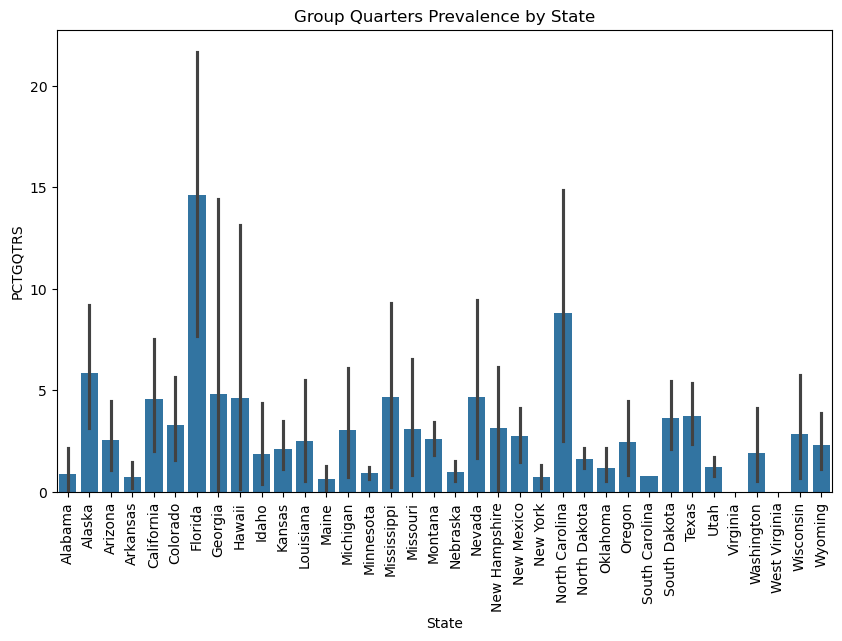

In [61]:
plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='PCTGQTRS', data=data)  # Replace with 'PCTGQTRS' for group quarters prevalence
plt.xticks(rotation=90)
plt.title('Group Quarters Prevalence by State')
plt.show()

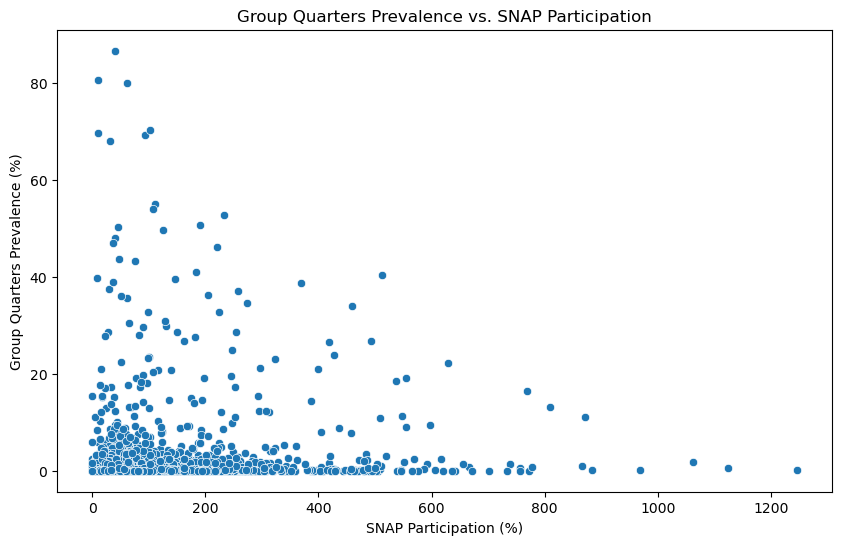

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TractSNAP', y='PCTGQTRS', data=data)
plt.title('Group Quarters Prevalence vs. SNAP Participation')
plt.xlabel('SNAP Participation (%)')
plt.ylabel('Group Quarters Prevalence (%)')
plt.show()

The analysis of group quarters prevalence in U.S. census tracts shows significant variation by state and socioeconomic factors. States like Florida and North Carolina exhibit higher group quarter prevalence, which could be indicative of factors like higher elderly populations or larger institutionalized populations. SNAP participation shows a general trend of higher participation correlating with lower group quarters prevalence, but further investigation is required to fully understand these relationships.

There is a need for targeted policy interventions in areas with high group quarters prevalence, focusing on improving living conditions and reducing institutional care reliance. Additionally, further exploration of race/ethnicity and urban/rural dynamics will deepen our understanding of how socioeconomic and demographic factors influence group quarters residency.